<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قدم نو رسیده!
</font>
</h1>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این تمرین با در اختیار داشتن مجموعه‌داده‌ای از نام‌های افراد در کشورهای مختلف قصد داریم پیش‌بینی کنیم یک نام متعلق به چه زبان/کشوری‌ست. برای این‌کار از شبکه‌های عصبی بازگشتی کمک خواهیم گرفت تا با مشاهده‌ی کاراکترهای یک نام، ملیت آن را حدس بزند.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیاز را وارد کنید. توجه داشته‌باشید استفاده از کتابخانه‌هایی به غیر از موارد مشخص شده <b>مجاز</b> می‌باشد
</font>
</p>

In [ ]:
# !pip install keras --upgrade
# Uncomment the above line if you don't have keras 3 installed

In [1]:
import numpy as np
import pandas as pd

import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
print(keras.__version__)

3.4.1


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
مجموعه‌داده‌ی این تمرین به‌صورت یک سری فایل متنی در اختیار شما قرار گرفته است. در داخل پوشه‌ی <code>train</code> یک سری فایل متنی با پسوند <code dir=ltr>.txt</code> مشاهده می‌کنید که نام هر فایل بیان‌گر زبان/ملیت نام‌های موجود در فایل است و در هر خط از فایل مربوطه یک نام نوشته شده است. در فایل <code>test.csv</code> نیز لیستی از نام‌ها در اختیار شما قرار گرفته که نیاز است با استفاده از مدل خود ملیت آن‌ها را پیش‌بینی کنید.
با توجه به توضیحات گفته‌شده ابتدا نمونه‌های آموزشی را خوانده و یک دیتافریم با ساختار زیر بسازید.

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| نام ستون | توضیحات ستون |
|:----------:|:------------------:|
| <code>Orgin</code> | اصلیت نام|
| <code>Name</code> | نام |

</font>
</div>

</center>
</font>
</div>

In [12]:
df = pd.DataFrame(columns=['Name', 'Origin']) # TODO
dirname = './data/train/'
filenames = os.listdir(dirname) # TODO

for filename in filenames:
    file = open(f'{dirname}/{filename}', 'r')
    origin = filename.split('.')[0]
    lines = [line.strip() for line in file.readlines()] # TODO


    for line in lines:
        df.loc[len(df)] = [line, origin] # TODO

In [13]:
df.head(10)

,Name,Origin
0,Ababko,Russian
1,Abaev,Russian
2,Abagyan,Russian
3,Abaidulin,Russian
4,Abaidullin,Russian
5,Abaimoff,Russian
6,Abaimov,Russian
7,Abakeliya,Russian
8,Abakovsky,Russian
9,Abakshin,Russian


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
همچنین فایل نمونه‌های آزمون را نیز به‌شکل یک دیتافریم بخوانید.
</font>
</p>

In [14]:
test = pd.read_csv('./data/test.csv') # TODO
test.head(10)

,Name
0,Feng
1,Tchekhlakovsky
2,Khouri
3,Janov
4,Oquendo
5,Emberey
6,Hirata
7,Uemlyanin
8,Haidukov
9,Abdrazakov


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
همان‌طور که می‌دانید برای مدل تنها اعداد معنی دارند، بنابراین نیاز است که کلمات را به‌ ماتریس‌های عددی تبدیل کنیم. برای این‌کار از یک روش خیلی ساده مشابه آنچه در درسنامه‌های پیاده‌سازی در کراس در این فصل دیدیم، استفاده خواهیم کرد.
در این روش هر کلمه را به برداری به اندازه‌ی تمامی حروف موجود در تمامی کلمات تبدیل می‌کنیم (به‌طور مثال اگر بدانیم که تمامی کلمات فقط از حروف انگلیسی ساخته شده‌اند. هر کلمه به ماتریسی به ابعاد طول کلمه در ۲۶ تبدیل می‌شود.
<br>
به‌طور مثال فرض کنید کلمات فقط از حروف کوچک الفبای انگلیسی ساخته شده‌اند و حرف <code>a</code> معادل نمایه‌ی <code>0</code>، حرف <code>b</code> معادل نمایه‌ی <code>1</code> و به همین ترتیب تا <code>z</code> معادل نمایه‌ی <code>25</code> را داریم. حال کلمه‌ی <code>data</code> به ماتریسی با ابعاد ۴ در ۲۶ در می‌آیند به طوری‌که در سطر اول تمامی مقادیر به‌جز خانه‌ی مربوط به نمایه‌ی حرف <code>d</code> که معادل <code>3</code> است، مقدار ۰ دارند. در سطر دوم به همین‌صورت برای حرف <code>a</code> و تا انتها.
</font>
</div>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
برای پیاده‌سازی روش خواسته‌شده،
در ابتدا باید لیستی از حروفی که در مجموعه‌داده استفاده شده را به دست آورید. توجه داشته باشید می‌توانید حروف را تماماً کوچک کنید یا حروفی که در زبان انگلیسی موجود نیستند مانند <code>è</code> را تبدیل به مشابه آن در انگلیسی کنید. البته این‌کار کاملاً اختیاری می‌باشد و تضمینی برای بهبود مدل با این‌کار وجود ندارد.
</font>
<details dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="rtl" style="color:orange"><b>راهنمایی</b></summary>


یک <code>set</code> به نام <code>chars</code> بسازید و در یک حلقه به ازای نام‌های موجود در دیتافریم از دستور <code>()chars.update</code> استفاده کنید. با
استفاده از این دستور <b>نیازی نیست</b> روی حروف هر کلمه نیز پیمایش کنید.


</details>
</div>



In [27]:
chars = set({}) # TODO
# TODO: Create a set of all unique characters in the dataframe

for row in range(len(df)):
  name = df.loc[row, 'Name']
  chars.update(set([c for c in name]))

chars = list(chars)
print(chars)

['d', 'H', 'g', 'B', '1', 'ñ', 'á', '-', 'G', 'è', 'y', 'j', 'v', 'ö', 't', 'c', 'E', 'ú', 'ì', '/', 'l', 'ą', 'í', 'f', 'W', 'n', 'q', 'ü', ':', 'Ż', 'V', 'T', 'D', 'X', 'ß', 'A', 'u', 'ù', 'L', 'z', 'R', 'I', 'ł', 'x', 'K', 'ń', 'h', '\xa0', 'Ś', 'm', 'É', 'a', 'ó', 'Z', 'ä', 'C', ' ', 'ê', 'ż', 'k', 'Q', 'w', 'r', 'ç', 'P', 'p', 's', 'o', 'b', 'N', 'é', 'U', 'Á', 'M', 'ò', 'ã', 'F', 'J', 'i', 'Y', ',', 'õ', "'", 'à', 'O', 'e', 'S']


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
در روش کد کردن کلمات گفتیم ابعاد ماتریس هر کلمه به‌صورت طول کلمه در تعداد کل حروف موجود در مجموعه‌داده می‌باشد، اما این روش یک مشکل اساسی دارد. ما برای آموزش مدل نیاز داریم که ابعاد تمامی ورودی‌ها با یک‌دیگر برابر باشند، اما در این روش این ابعاد با یک دیگر برابر نیستند. برای رفع این مشکل می‌توانیم از تکنیک‌های متنوعی استفاده کنیم. یکی از ساده‌ترین تکنیک‌ها این‌ است که طول تمامی کلمات را به اندازه‌ی بزرگ‌ترین کلمه‌ی موجود در مجموعه‌داده در نظر بگیریم و سطر‌های اضافه را با ۰ پر کنیم. بنابراین در این مرحله لازم است طول بزرگترین کلمه‌ی موجود در مجموعه‌داده را بیابید.
</font>
</div>


In [23]:
longest_string = max([len(name) for name in df['Name']])# TODO
print(longest_string)

20


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
حال باید یک تابع تعریف کنیم تا به‌ازای هر کلمه ماتریس معادل آن را بسازد. نام این تابع را  <code>encode</code> می‌گذاریم، این تابع کلمه‌ای که می‌خواهیم کد کنیم (<code>my_word</code>)، آرایه‌ای از کل حروفی که در مجموعه کلمات داریم (<code>chars</code>) و طول بزرگترین کلمه (<code>max_len</code>) را به‌عنوان ورودی دریافت می‌کند و یک ماتریس به ابعاد طول بزرگترین کلمه در طول آرایه‌ی حروف موجود در مجموعه‌داده (<code>(max_len, len(chars)</code>)، که معادل کد شده‌ی کلمه وروردی است را برمی‌گرداند.
به‌طور مثال فرض کنید مجموعه‌ی حروف یکتا (<code>chars</code>) برابر با <code dir=ltr>[a,b,c,d,e,f]</code> ‌باشد و طولانی‌ترین کلمه در مجموعه‌داده <code>abcdefab</code> باشد که طول آن برابر ۸ است. آن‌گاه کلمه‌ی <code>bed</code> به‌صورت زیر در می‌آید:<br>

<code dir=ltr>[[0,1,0,0,0,0], <br>
  [0,0,0,0,1,0],  <br>
  [0,0,0,0,1,0], <br>
  [0,0,0,0,0,0], <br>
  [0,0,0,0,0,0], <br>
  [0,0,0,0,0,0], <br>
  [0,0,0,0,0,0], <br>
  [0,0,0,0,0,0]]
</code>


</font>
</div>

In [32]:
def encode(my_word, chars = chars, max_len = longest_string): # TODO
    x = np.zeros((max_len, len(chars)))
    char_indices = dict((c, i) for i, c in enumerate(chars))

    for i, c in enumerate(my_word):
      x[i, char_indices[c]] = 1

    return x

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
حال در این مرحله تابع <code>encode</code> را روی تمامی کلمات مجموعه‌داده اعمال کنید. توجه داشته باشید لیستی که در آن مجموعه‌داده‌ی کدگذاری‌شده را نگه‌داری می‌کنید با نام <code>X</code> باشد و حتماً در نهایت به‌صورت آرایه‌ی نامپای در بیاد تا در ادامه با مشکل مواجه نشوید.
</font>
</div>

In [36]:
X = np.array([encode(name) for name in df['Name']]) # TODO
X.shape

(20074, 20, 87)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
عملیات قبل را برای مجموعه‌ی آزمون نیز انجام دهید.
</font>
</div>

In [37]:
test_x = np.array([encode(name) for name in test['Name']]) # TODO
test_x.shape

(1004, 20, 87)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
همان‌طور که می‌دانید هنگامی‌که تعداد دسته‌های مسئله بیشتر از دو مورد باشد یا به بیان دیگر مسئله‌ی ما دودویی نباشد، نیاز است که یک ماتریس تک‌نمود (One-hot) به‌عنوان برچسب‌ها به مدل بدهیم. به صورتی‌که ابعاد ماتریس معادل تعداد نمونه‌ها در تعداد دسته‌ها باشد. در این حالت هر ستون بیان‌گر یک دسته خواهد بود. پس در این مرحله شما باید ماتریسی از برچسب‌ها بسازید.
دقت داشته باشید ستون‌های ماتریس در نهایت به ترتیب زیر باشد.

<code dir=ltr>[Arabic, Chinese, Czech, Dutch, English, French, German, Greek,	Irish, Italian, Japanese, Korean, Polish, Portuguese, Russian,Scottish, Spanish, Vietnamese]</code>
</font>
</div>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir"> به این معنی که برچسب ۰ بیان‌گر زبان عربی، برچسب ۱ بیان‌گر زبان چینی و به همین ترتیب تا انتها.
</font>
</div>

In [46]:
origins = ['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek',
             'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian',
             'Scottish', 'Spanish', 'Vietnamese']

y = pd.get_dummies(df['Origin'])
y = y.reindex(columns=languages, fill_value=0).astype(int)

y.shape

(20074, 18)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
در نهایت در این مرحله قبل از طراحی و ساخت مدل، مجموعه‌داده‌ی آموزش و اعتبارسنجی را جدا کنید.
</font>
</div>

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1) # TODO

print(X_train.shape, '-', y_train.shape)
print(X_valid.shape, '-', y_valid.shape)

(18066, 20, 87) - (18066, 18)
(2008, 20, 87) - (2008, 18)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساخت و طراحی مدل</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این مرحله شما باید با استفاده از مدل‌های دنباله‌ای که آموخته‌اید مدلی طراحی کنید تا بتواند میزان یا احتمال تعلق ورودی به هر دسته را نشان دهد. یعنی ورودی یک کلمه و خروجی برداری به اندازه‌ی تعداد دسته‌هاست که نشان می‌دهد کلمه‌ی ورودی به چه میزان به دسته‌ی ایندکس بردار خروجی تعلق دارد.
<br>
همچنین توجه داشته باشید که برای ارزیابی مدل شما از سطح زیر ناحیه نمودار <code>ROC</code> استفاده می‌شود. برای مطالعه بیشتر در مورد این نمودار می‌توانید <a href = 'https://en.wikipedia.org/wiki/Receiver_operating_characteristic'> ویکی‌پدیا </a>
    یا <a href = 'https://stanford.edu/~shervine/l/fa/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks'> راهنمای کوتاه نکات و ترفندهای یادگیری ماشین </a>
 را مطالعه کنید.
</font>
</p>


<details dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="rtl" style="color:red"><b>توجه!</b></summary>

مدل شما باید از نوع چند به یک باشد که در لایه‌ی متراکم (<code>Dense</code>) آخر به تعداد دسته‌های مسئله نورون وجود دارد.

</details>
<details dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="rtl" style="color:orange"><b>راهنمایی</b></summary>
با استفاده از یک لایه <code>GRU</code> با تعداد ۲۵۶ واحد به‌احتمال خوبی به آستانه‌ی خواسته‌شده‌ی تمرین خواهید رسید.

</details>
</div>

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, GRU, Dropout

In [73]:
model = Sequential()
# TODO : Design and Complie model
model.add(Input(shape=(X.shape[1], X.shape[2])))
model.add(GRU(256))
model.add(Dropout(0.5))
model.add(Dense(len(origins), activation='softmax'))

In [76]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'AUC'])

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مدل خود را بر روی نمونه‌های آموزشی، آموزش دهید و طبق عملکرد آن روی نمونه‌های اعتبارسنجی بهبود دهید.<br>
<font color="red"><b color='red'>توجه:</b></font>
 با توجه به تعداد نمونه‌ها ممکن است مدل شما با تعداد دورهای بیشتر به‌دقت بهتری برسد، پس مطمئن شوید که آموزش مدل کامل شده و به همگرایی رسیده باشد.
</font>
</p>

In [77]:
epochs = 100 # You can change it
batch_size = 1024 # You can change it

early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb]) # TODO

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - AUC: 0.8561 - accuracy: 0.3760 - loss: 2.2573 - val_AUC: 0.9039 - val_accuracy: 0.4532 - val_loss: 1.6427
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - AUC: 0.9031 - accuracy: 0.4797 - loss: 1.6710 - val_AUC: 0.9036 - val_accuracy: 0.4547 - val_loss: 1.6614
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - AUC: 0.9099 - accuracy: 0.4882 - loss: 1.5823 - val_AUC: 0.9073 - val_accuracy: 0.4895 - val_loss: 1.5971
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - AUC: 0.9132 - accuracy: 0.5134 - loss: 1.5529 - val_AUC: 0.9096 - val_accuracy: 0.5423 - val_loss: 1.5803
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - AUC: 0.9153 - accuracy: 0.5362 - loss: 1.5291 - val_AUC: 0.9110 - val_accuracy: 0.5398 - val_loss: 1.5604
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - AUC: 0.9161 - accuracy: 0.5425 - loss: 1.5219 - val_AUC: 0.9134 - val_accuracy: 0.5423 - val_loss: 1.5381
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/

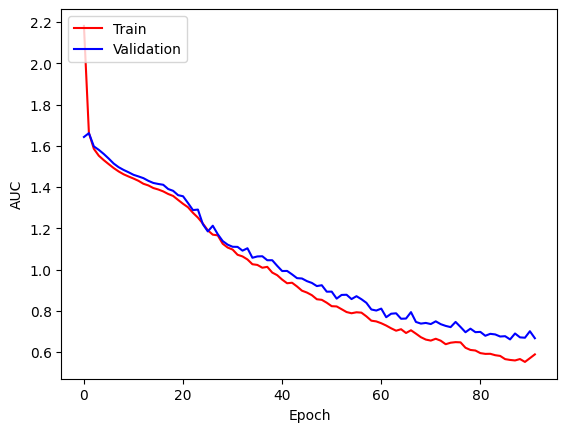

In [78]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌بینی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
خروجی‌ مدل خود را بر روی نمونه‌های آزمون که در فایل قرار داشت به دست آورید.
</font>
</p>

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی (۱)
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
برای ارزیابی عملکرد مدل شما بر روی نمونه‌های آزمون از معیار <code>ROC</code> استفاده می‌کنیم.
</font>
</p>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
 جهت کسب امتیاز کامل این مرحله نیاز است تا پاسخ شما حداقل امتیاز <code>93</code> را با توجه به معیار معرفی‌شده کسب نماید.
</p>

In [79]:
y_pred = model.predict(test_x) # TODO

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی (۲)
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در مرحله‌ی قبل برای نمونه‌های آزمون میزان تعلق به کلاس‌های مختلف را پیش‌بینی کردید، حال در این مرحله برای هر نمونه برچسیب نهایی را
گزارش کنید. یعنی مشخص کنید هر نمونه متعلق به کدام شماره‌ی دسته است. (نیازی نیست برچسب را تبدیل به زبان آن کلاس کنید)
.
 پیش‌بینی نهایی برچسب‌ها را در ستون <code>prediction</code> دیتافریمی با نام <code>submission</code> ذخیره کنید. توجه داشته باشید که ترتیب مقادیر این ستون باید دقیقاً معادل با ترتیب نمونه‌های آزمون باشد. به این معنی که  ردیف <code>i</code> ام ستون <code>submission</code>، پیش‌بینی شما برای سطر ردیف <code>i</code> ام فایل آزمون باشد (دقت کنید که این ستون باید حتما دارای <code>header</code> باشد).
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
 نمونه‌ی خروجی دیتافریم <code>submission</code> (فقط سه خط اول به‌همراه نام ستون):
 </font>
</p>
<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

|<code>prediction</code>|
|:------:|
|1|
|10|
|14|

    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
توجه داشته باشید معیار ارزیابی دوم مدل شما در این تمرین معیار <code>F1 score</code> است، که می‌توانید مستندات آن را در <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html'>این لینک</a> مطالعه نمایید. لازم به ذکر است که از حالت میانگین‌گیری <code>"weighted"</code> این معیار استفاده خواهد شد.
</font>
</p>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
 جهت کسب امتیاز کامل نیاز است تا پاسخ شما حداقل امتیاز <code>82</code> را با توجه به معیار معرفی‌شده کسب نماید.
</font>
</p>


In [85]:
submission = pd.DataFrame(np.argmax(y_pred, axis=1), columns=["prediction"]) # TODO
submission

,prediction
0,1
1,14
2,0
3,14
4,16
...,...
999,9
1000,14
1001,14
1002,4


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد. همچنین اگر از گوگل کولب استفاده می‌کنید، در صورت نیاز به پشتیبانی حتماً آخرین نسخه از نت‌بوک را به‌صورت دستی دانلود کرده و داخل فایل ارسالی قرار دهید یا لینک کولب را با ما به‌اشتراک بگذارید.
</font>
</p>

In [86]:
import zipfile
import joblib
import os

if not os.path.exists(os.path.join(os.getcwd(), 'new_born.ipynb')):
    %notebook -e new_born.ipynb

np.save("y_pred.npy", y_pred)
submission.to_csv('submission.csv', index=False)

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ['new_born.ipynb', 'submission.csv', 'y_pred.npy']
compress(file_names)

File Paths:
['new_born.ipynb', 'submission.csv', 'y_pred.npy']
